In [2]:
# Iris 데이터로 랜덤 포레스트 구현해보기
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [9]:
# 1. Training data와 Test 데이터 나누기 (train:test=8:2, random_state=123)
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
X_features = iris_df.iloc[:,:-1]
y_labels = iris_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=123)

In [13]:
# 2. 랜덤 포레스트 분류기 생성, 학습, 예측
from sklearn.ensemble import RandomForestClassifier
# n_estimators=10
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

In [14]:
# 3. 랜덤 포레스트 분류기의 성능 평가
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86         8
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30



In [16]:
# 피처 중요도 확인하기
for feature, imp in zip(iris.feature_names, rfc.feature_importances_):
    print(feature, imp)

sepal length (cm) 0.17061923947376811
sepal width (cm) 0.027622325107367895
petal length (cm) 0.3276518735556894
petal width (cm) 0.47410656186317457


#### 구남이

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

citrus_df = pd.read_csv('./data/citrus.csv')
citrus_df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [34]:
# Q1. 'name열의 'orange'는 1, 'grapefruit'은 0값을 가지도록 바꿔주고 y_citrus_df에 저장하기
y_citrus_df = citrus_df.replace({'orange':1,'grapefruit':0})['name']

# Q2. 피처 값으로 이루어진 X_citrus_df 만들기
X_citrus_df = citrus_df.drop('name',axis=1)

# Q3. 훈련 데이터 / 테스트 데이터로 구분
X_train, X_test, y_train, y_test = train_test_split(X_citrus_df, y_citrus_df, test_size=0.2, random_state=0)

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

In [38]:
# Q4. pred_proba에 1에 대한 예측확률 저장하기
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [43]:
# Q5. 오차행렬, 정확도, 정밀도, 재현율, F1 스코어 출력하기
get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[977  35]
 [ 58 930]]
정확도: 0.9535, 정밀도: 0.9637, 재현율: 0.9413,    F1: 0.9524, AUC:0.9870


#### 강수민

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

diabetes_data = pd.read_csv('./data/diabetes.csv') # 교재 실습 데이터
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [46]:
# 전처리
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [47]:
# Q1. 당뇨병 데이터 셋을 마지막 열(Outcome)을 y로, 이를 제외한 모든 열을 X로 설정하라.
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

In [73]:
# Q2. train_test_split를 이용해 학습용, 테스트용 데이터를 나눠라. (원래 데이터 분포와 유사하게 추출하기, test_size=0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

In [74]:
# Q3. 하이퍼 파라미터를 디폴트로 설정해 결정트리 분류를 시행하고 이 때의 기본 하이퍼 파라미터를 추출해라.
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)
params = dt_clf.get_params()
params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [75]:
# Q4. 하이퍼 파라미터 튜닝을 통해 최고 평균 정확도 수치와 최적 하이퍼 파라미터 추출하기

params = {
    'max_depth': [8, 12, 16, 20], 
    'min_samples_split': [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:',grid_cv.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_split': 16}
최고 예측 정확도: 0.713288018126083


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.7s finished


In [79]:
# Q5. grid_cv의 최적 추정량을 찾아 다시 결정 트리의 예측 정확도 값을 추출해라

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

0.7532467532467533

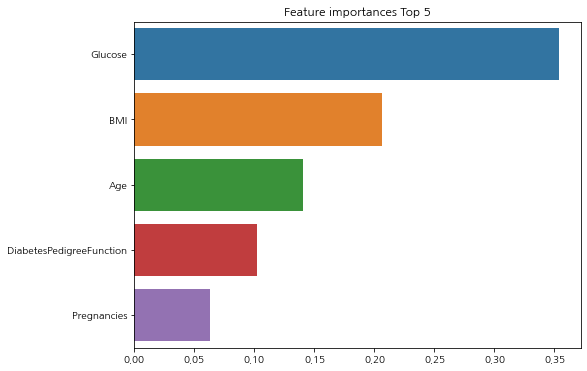

In [78]:
# Q6. 피처별 중요도 그래프로 나타내기(5개만 뽑아 나타내기)

import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5 , y = ftr_top5.index)
plt.show()

#### 박민영

In [66]:
# iris 데이터에 XGBoost 알고리즘(파이썬 래퍼를 이용)을 적용하고자 한다.

# 1. 데이터를 불러오기 위해 아래 빈칸을 채워라.
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = load_iris()
features = dataset.data
labels = dataset.target

iris_df = pd.DataFrame(data = features, columns = dataset.feature_names)
iris_df['target'] = labels
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [67]:
# 2. 데이터를 학습, 검증, 예측 데이터셋으로 분할하기 위해 아래 빈칸을 채워라.
# 단, 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 분리
# 80%의 학습용 데이터를 다시 분리하여 90%는 학습용 데이터, 10%는 검증용 데이터로 분리

X_features = iris_df.iloc[:,:-1]
y_label = iris_df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

In [68]:
# 3. [파이썬 wrapper] 학습, 검증, 예측 데이터 세트를 DMatrix 객체인 dtr, dval, dtest로 변환하여라.

import xgboost as xgb
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [69]:
# 4. [파이썬 wrapper]설정한 하이퍼 파라미터와 early stopping 파라미터를 전달하여 학습하기 위해 아래 빈칸을 채워라.
# 조기 중단을 위한 횟수는 50회로 설정

params = {'max_depth':3,
          'eta':0.05,
          'eval_metric':'logloss'}
num_rounds = 400

eval_list = [(dtr, 'train'), (dval, 'e                                                                                                                                                                                                                                                                                                                                                                                                                                                         al')]

xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds,
                      early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.52515	eval-logloss:0.57417
[1]	train-logloss:0.36788	eval-logloss:0.46432
[2]	train-logloss:0.21566	eval-logloss:0.35978
[3]	train-logloss:0.06264	eval-logloss:0.25678
[4]	train-logloss:-0.09918	eval-logloss:0.15104
[5]	train-logloss:-0.28442	eval-logloss:0.03327
[6]	train-logloss:-0.53285	eval-logloss:-0.11976
[7]	train-logloss:-1.15778	eval-logloss:-0.49001
[8]	train-logloss:-10.38971	eval-logloss:-5.85320
[9]	train-logloss:-10.42178	eval-logloss:-5.87000
[10]	train-logloss:-10.45012	eval-logloss:-5.88564
[11]	train-logloss:-10.48881	eval-logloss:-5.90023
[12]	train-logloss:-10.52963	eval-logloss:-5.91385
[13]	train-logloss:-11.46938	eval-logloss:-5.92658
[14]	train-logloss:-11.49434	eval-logloss:-5.93849
[15]	train-logloss:-11.81147	eval-logloss:-5.94946
[16]	train-logloss:-12.12911	eval-logloss:-5.95975
[17]	train-logloss:-12.13713	eval-logloss:-5.96941
[18]	train-logloss:-12.14505	eval-logloss:-5.97879
[19]	train-logloss:-12.15212	eval-logloss:-5.98731
[20]	tra

[160]	train-logloss:-12.27689	eval-logloss:-6.13777
[161]	train-logloss:-12.27695	eval-logloss:-6.13789
[162]	train-logloss:-12.27692	eval-logloss:-6.13782
[163]	train-logloss:-12.27701	eval-logloss:-6.13794
[164]	train-logloss:-12.27701	eval-logloss:-6.13794
[165]	train-logloss:-12.27706	eval-logloss:-6.13805
[166]	train-logloss:-12.27703	eval-logloss:-6.13799
[167]	train-logloss:-12.27711	eval-logloss:-6.13810
[168]	train-logloss:-12.27708	eval-logloss:-6.13804
[169]	train-logloss:-12.27716	eval-logloss:-6.13815
[170]	train-logloss:-12.27716	eval-logloss:-6.13814
[171]	train-logloss:-12.27722	eval-logloss:-6.13825
[172]	train-logloss:-12.27718	eval-logloss:-6.13818
[173]	train-logloss:-12.27711	eval-logloss:-6.13817
[174]	train-logloss:-12.27709	eval-logloss:-6.13811
[175]	train-logloss:-12.27709	eval-logloss:-6.13810
[176]	train-logloss:-12.27716	eval-logloss:-6.13814
[177]	train-logloss:-12.27723	eval-logloss:-6.13824
[178]	train-logloss:-12.27721	eval-logloss:-6.13819
[179]	train-

In [70]:
# 5. [파이썬 wrapper] predict() 함수를 적용하여 예측 확률값을 반환하고, 이를 다시 예측값으로 반환하기 위한 빈칸을 채워라.
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3)) # predict() 수행 결과값을 10개만 표시

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 probs에 저장
# 이 때, 리스트 내포 내의 if-else 문을 사용하여라.
preds = [1 if x>0.5 else 0 for x in pred_probs]

[2.002e+00 1.000e-03 9.780e-01 2.023e+00 1.000e-03 1.272e+00 2.126e+00
 2.016e+00 1.000e-03 1.909e+00]


In [72]:
# 6. 정확도를 이용한 예측 평가를 위해 빈 칸을 채워라.

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.6
